<a href="https://colab.research.google.com/github/1900690/DX-group-text/blob/main/AI%E5%AD%A6%E7%BF%92%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**学習の事前準備を行う**
※ランタイムをGPUにすることで学習速度を早くする（ただし学習時間が長くなると使用制限に引っかかる。制限は日をまたぐと解除される）


In [1]:
#@title 1.グーグルドライブに接続
#@markdown ※グーグルドライブ上で計算を行うことで学習結果が記録され、不意の切断等のトラブルが発生しても学習を再開できる

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#@title 2.学習に使用する画像をアップロード
#@markdown [FastLabel]の”エクスポート”で出力形式：YOLO、画像出力：オリジナルを選択して作成したzipファイルをそのままアップロードしてください

#ライブラリをインポート(機能を使えるようにする)
import shutil
import os
from google.colab import files
import math

#スイッチ
グーグルドライブからアップロード=False#@param {type:"boolean"}
driveup=グーグルドライブからアップロード
ローカルからアップロード=True#@param {type:"boolean"}
direct=ローカルからアップロード

#すでにフォルダがある場合は消す
if os.path.exists("/content/data"):
  shutil.rmtree("/content/data")
if os.path.exists("/content/data.zip"):
  os.remove("/content/data.zip")

if direct==True:
  #データをアップロード
  uploaded = files.upload()
  file_name = list(uploaded.keys())[0]
  #データを解凍
  shutil.unpack_archive('/content/'+file_name, '/content/data')
  #zipを消去
  os.remove("/content/"+file_name)

if driveup==True:
  #グーグルドライブに接続
  drive.mount('/content/drive')
  #グーグルドライブからcontentにコピー
  shutil.copyfile("/content/drive/MyDrive/data.zip","/content/data.zip")
  #データを解凍
  shutil.unpack_archive('/content/data.zip', '/content/data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#@title 3.画像を学習用とテスト用に分割
#ライブラリをインポート
import shutil
import os
from sklearn.model_selection import train_test_split
import math

#分割元のパスを作成
originals='/content/data/original'
annotations='/content/data/yolo/annotations'

#分割先のパスを作成
train_images = '/content/datasets/custom/train/images'
train_labels = '/content/datasets/custom/train/labels'
valid_images = '/content/datasets/custom/valid/images'
valid_labels = '/content/datasets/custom/valid/labels'

#分割先のファイルを作成
if os.path.exists('/content/datasets/custom'):
  shutil.rmtree('/content/datasets/custom')
if not os.path.exists('/content/datasets/custom'):
  os.makedirs(train_images)
  os.makedirs(train_labels)
  os.makedirs(valid_images)
  os.makedirs(valid_labels)

#ファイルをコピー
#if os.path.exists(originals):
#  shutil.rmtree(originals)
#if os.path.exists(annotations):
#  shutil.rmtree(annotations)
#if not os.path.exists(originals):
#  shutil.copytree('/content/cut_crear',originals)
#if not os.path.exists(annotations):
#  shutil.copytree('/content/annotations',annotations)


#フォルダの中のファイルのリストを作成
read_files_annotations = os.listdir(annotations)
read_files_annotations.sort()
read_files_originals= os.listdir(originals)
read_files_originals.sort()


#@markdown 画像のうち何％をテスト用に分割するのかを定義
分割割合=0.2#@param {type:"slider", min:0, max:1, step:0.1}

#分割割合に合わせてファイルのリストを分割
annotations_train, annotations_test, originals_train, originals_test = train_test_split(read_files_annotations,read_files_originals,test_size=分割割合)

#害虫がいる画像とアノテーションを分ける
for filename in annotations_train:
  shutil.copy( annotations+"/"+filename,train_labels)
for filename in annotations_test:
  shutil.copy( annotations+"/"+filename,valid_labels)
for filename in originals_train:
  shutil.copy( originals+"/"+filename,train_images)
for filename in originals_test:
  shutil.copy( originals+"/"+filename,valid_images)

#最大公約数を計算
greatest_common_divisor=math.gcd(sum(os.path.isfile(os.path.join(train_images, name)) for name in os.listdir(train_images)),sum(os.path.isfile(os.path.join(valid_images, name)) for name in os.listdir(valid_images)))

#分割されたファイル数を表示
print("train/imagesは",sum(os.path.isfile(os.path.join(train_images, name)) for name in os.listdir(train_images)))
print("train/labelsは",sum(os.path.isfile(os.path.join(train_labels, name)) for name in os.listdir(train_labels)))
print("valid/imagesは",sum(os.path.isfile(os.path.join(valid_images, name)) for name in os.listdir(valid_images)))
print("valid/labelsは",sum(os.path.isfile(os.path.join(valid_labels, name)) for name in os.listdir(valid_labels)))
print("最大公約数は",greatest_common_divisor)

train/imagesは 4
train/labelsは 4
valid/imagesは 1
valid/labelsは 1
最大公約数は 1


In [5]:
#@title 3.学習結果を保存するフォルダを作成
if not os.path.exists('/content/drive/MyDrive/custom-YOLOv8/'):
  os.mkdir('/content/drive/MyDrive/custom-YOLOv8/')

「number of classes:」と「class names:」の部分に印をつけたものの種類の数と印をつけたものの名前を記載して、実行ボタンを押す。

In [6]:
%%writefile /content/drive/MyDrive/custom-YOLOv8/data.yaml
# COCO 2017 dataset http://cocodataset.org

# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: ./custom/train
val: ./custom/valid

# number of classes:印をつけたものの種類の数を記載
nc: 1

# class names:印をつけたものの名前を記載
names: ['flower']

Overwriting /content/drive/MyDrive/custom-YOLOv8/data.yaml


In [7]:
#@title 4.ultralytics(AIライブラリ)をインストール
%pip -q install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.9/78.2 GB disk)


#**学習**

##1.学習設定について

*   モデルタイプは検出精度や速度ごとに様々。検出精度が高くなると速度が遅くなる
*   画像サイズは正方形であれば自動的に調整される



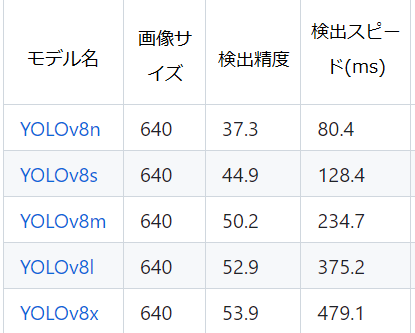

In [12]:
#@title 2-1.初めに学習を開始する場合
#スイッチ
選択するモデルタイプ="yolov8n.pt"#@param ["yolov8n.pt", "yolov8s.pt", "yolov8m.pt", "yolov8l.pt", "yolov8x.pt"]
#@markdown ※学習回数を変更する場合は”コードの表示”を押し、選んだモデルタイプの”epochs=”の後の数字を変更する。

#キャッチ前回の学習をを消しておく
import os
if os.path.exists("/content/datasets/custom/train/labels.cache"):
    os.remove("/content/datasets/custom/train/labels.cache")
if os.path.exists("/content/datasets/custom/valid/labels.cache"):
    os.remove("/content/datasets/custom/valid/labels.cache")
if os.path.exists("/content/drive/MyDrive/custom-YOLOv8/runs/detect/train"):
    shutil.rmtree("/content/drive/MyDrive/custom-YOLOv8/runs/detect/train")


#作業ディレクトリを移動
%cd '/content/drive/MyDrive/custom-YOLOv8/'

#confの値は閾値　epochsの値は学習回数を表す
if 選択するモデルタイプ=="yolov8n.pt":
  !yolo task=detect\
        mode=train\
        model=yolov8n.pt\
        data=data.yaml\
        conf=0.7\
        imgsz=640\
        epochs=10
if 選択するモデルタイプ=="yolov8s.pt":
  !yolo task=detect\
        mode=train\
        model=yolov8s.pt\
        data=data.yaml\
        conf=0.7\
        imgsz=640\
        epochs=10
if 選択するモデルタイプ=="yolov8m.pt":
  !yolo task=detect\
        mode=train\
        model=yolov8m.pt\
        data=data.yaml\
        conf=0.7\
        imgsz=640\
        epochs=10
if 選択するモデルタイプ=="yolov8l.pt":
  !yolo task=detect\
        mode=train\
        model=yolov8l.pt\
        data=data.yaml\
        conf=0.7\
        imgsz=640\
        epochs=10
if 選択するモデルタイプ=="yolov8x.pt":
  !yolo task=detect\
        mode=train\
        model=yolov8x.pt\
        data=data.yaml\
        conf=0.7\
        imgsz=640\
        epochs=10

/content/drive/MyDrive/custom-YOLOv8
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.7, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

In [ ]:
#@title 2-2.途中から学習を再開する場合

#@markdown ※”コードの表示”を押して、パスを記載する

#キャッチを消しておく
import os
if os.path.exists("/content/datasets/custom-YOLOv8/train/labels.cache"):
    os.remove("/content/datasets/custom-YOLOv8/train/labels.cache")
if os.path.exists("/content/datasets/custom-YOLOv8/valid/labels.cache"):
    os.remove("/content/datasets/custom-YOLOv8/valid/labels.cache")

#作業ディレクトリを移動
%cd '/content/drive/MyDrive/custom-YOLOv8/'

#”model=”から後の部分に前回学習した際の”last.pt”までのパスを記載する
!yolo task=detect mode=train resume=True model="/content/drive/MyDrive/custom-YOLOv8/runs/detect/train/weights/last.pt"

##3.学習結果について

*   mAPが検出精度を表し、1に近いほど検出精度が高いことを示す


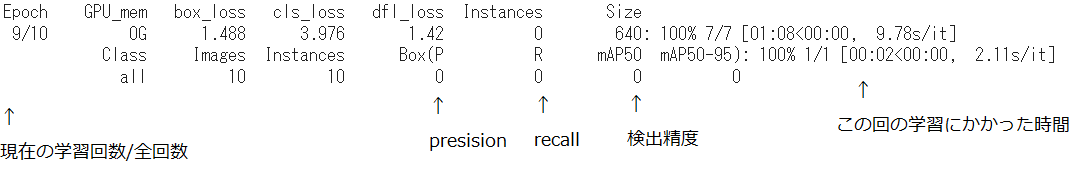

/content/drive/MyDrive/custom-YOLOv8/runs/detect/train/results.pngを表示します


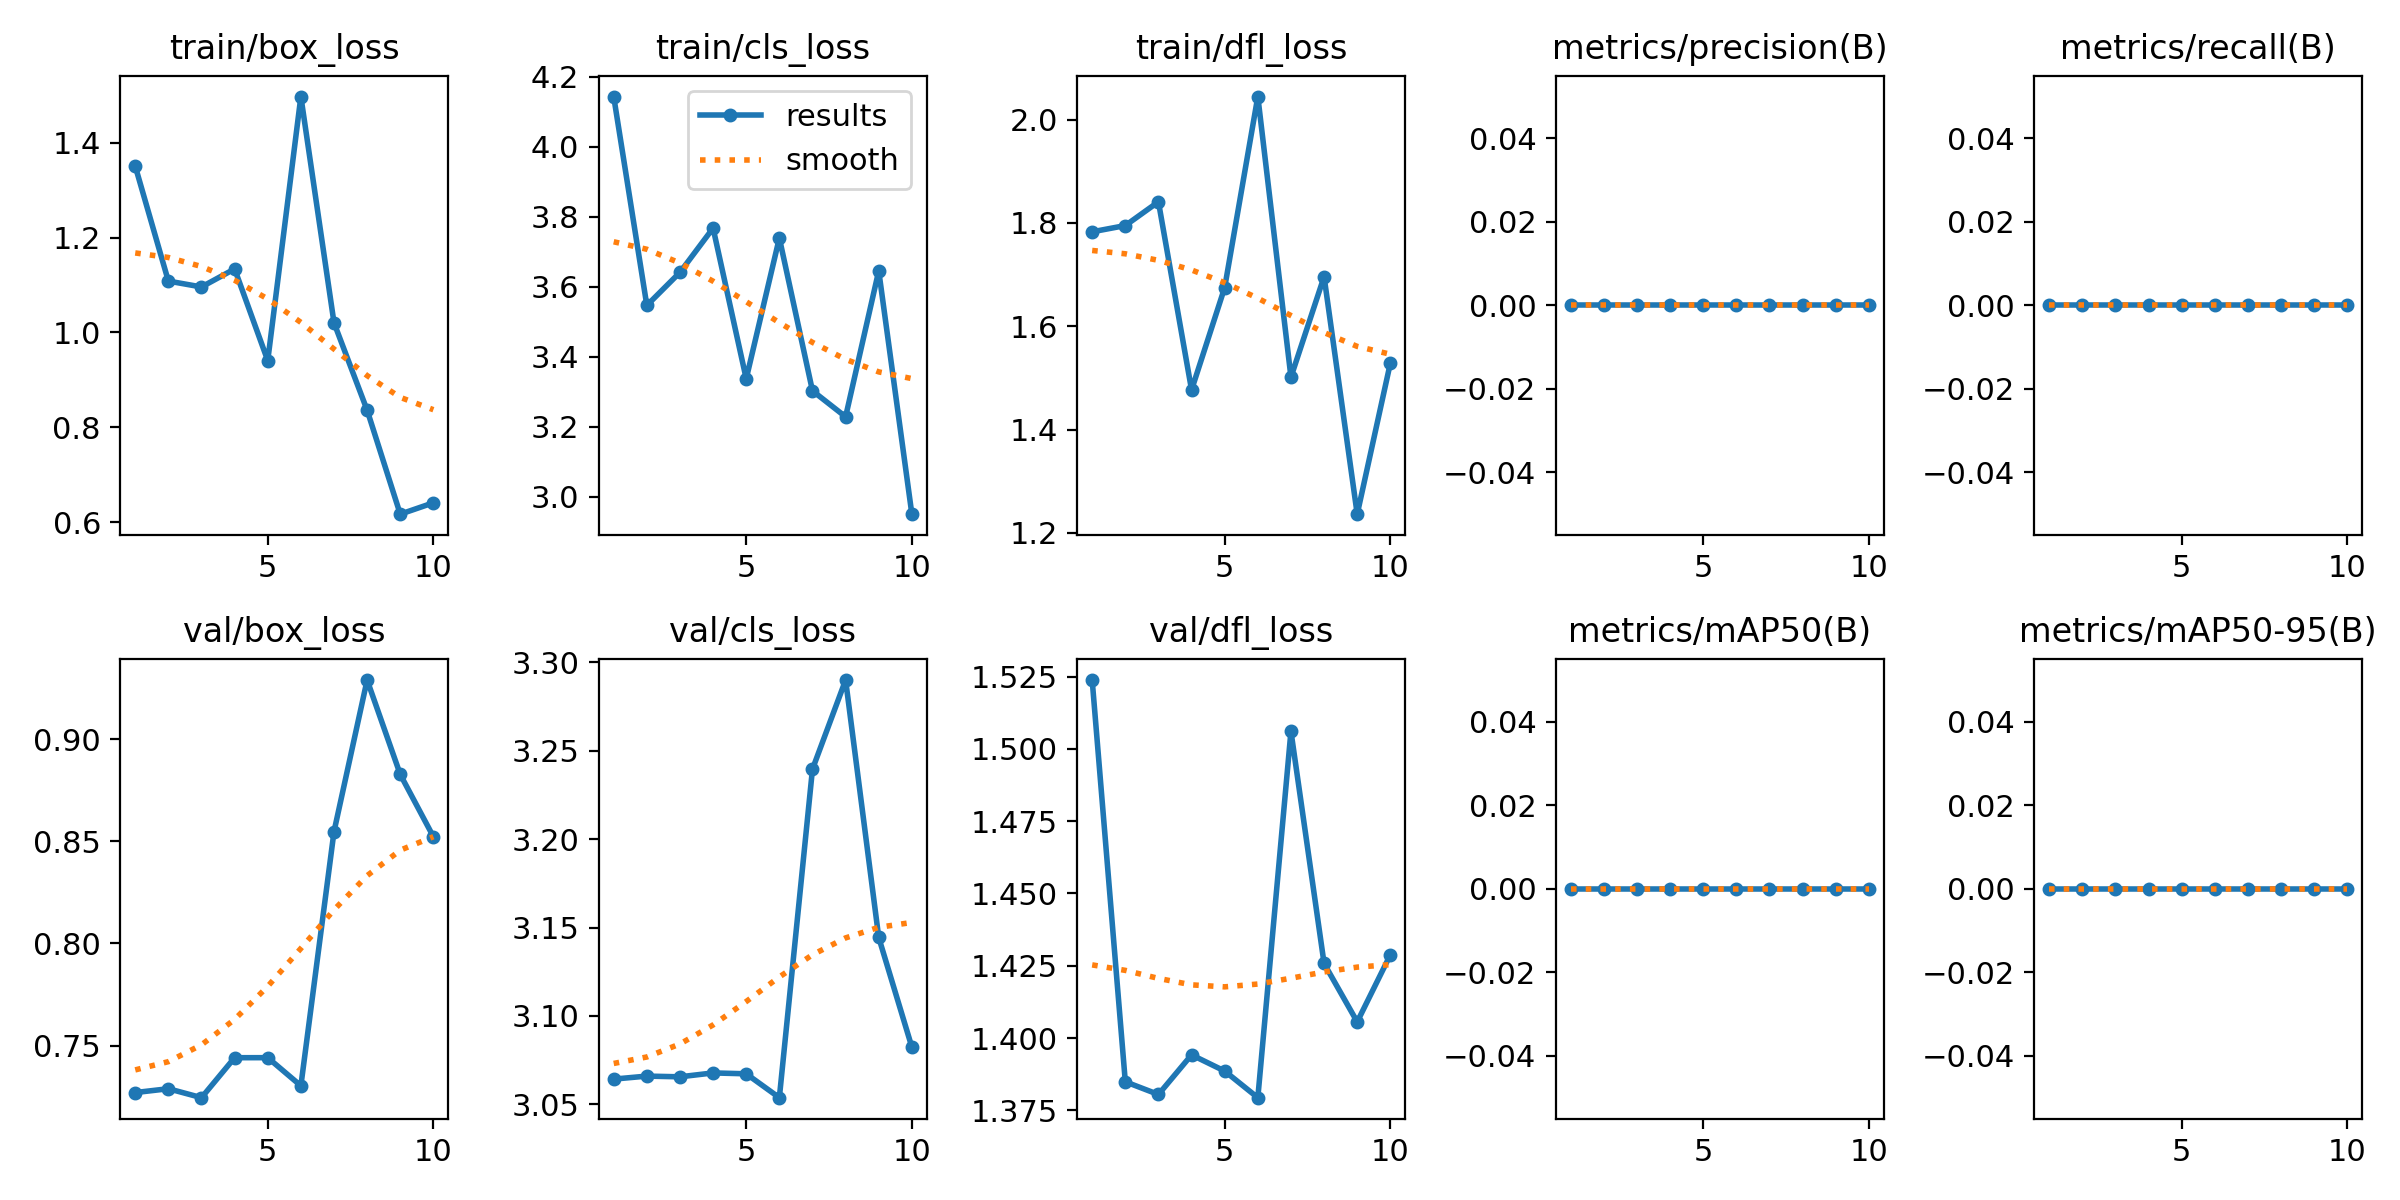

In [13]:
#@title 学習ごとの結果の推移を表示
#@markdown *  metrics/mAP50(B)が検出精度の推移を表す。１に近いほうが良い
#@markdown *  [そのほかの指標の見方についてはこちら](https://www.nakasha.co.jp/future/ai/yolov3train.html#:~:text=%E8%A9%95%E4%BE%A1%E6%8C%87%E6%A8%99%E3%81%AB%E3%81%A4%E3%81%84%E3%81%A6,%E3%81%A7%E3%81%8D%E3%81%AA%E3%81%84%E5%AD%90%EF%BC%89)

#ライブラリをインポート
from IPython.display import Image,display_png,display_jpeg

#最終学習結果が格納されているパスを取得
result_folda_pass="/content/drive/MyDrive/custom-YOLOv8/runs/detect/"
read_files_annotations = os.listdir(result_folda_pass)
read_files_annotations.sort(reverse=True)
result_pass=result_folda_pass+read_files_annotations[0]+"/results.png"

print(result_pass+"を表示します")
display_png(Image(result_pass))

##4.学習済みAIを保存

In [14]:
#ライブラリをインポート
import shutil
import os
from google.colab import files

#スイッチ
ファイルをダウンロードする=True#@param {type:"boolean"}
direct=ファイルをダウンロードする

#最終学習結果が格納されているパスを取得
result_folda_pass="/content/drive/MyDrive/custom-YOLOv8/runs/detect/"
read_files_annotations = os.listdir(result_folda_pass)
read_files_annotations.sort(reverse=True)
result_pass=result_folda_pass+read_files_annotations[0]+"/weights/best.pt"

if direct==True:
  files.download(result_pass)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#推論



In [18]:
#@title 1.推論に使う画像をアップロード

#ライブラリをインポート(機能を使えるようにする)
import shutil
import os
from google.colab import files
import math


#すでにフォルダがある場合は消す
if os.path.exists("/content/inference-data"):
  shutil.rmtree("/content/inference-data")
if not os.path.exists('/content/inference-data'):
  os.mkdir('/content/inference-data')

%cd "/content/inference-data"

#データをアップロード
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
#データを解凍
if os.path.exists("/content/"+file_name):
  shutil.unpack_archive('/content/'+file_name, '/content/inference-data')
#zipを消去
if os.path.exists("/content/"+file_name):
  os.remove("/content/"+file_name)

/content/inference-data


Saving DSC_1046.jpg to DSC_1046.jpg


In [23]:
#@title 2.推論に使うAIをアップロード

#ライブラリをインポート(機能を使えるようにする)
import shutil
import os
from google.colab import files
import math
import glob

#すでにフォルダがある場合は消す
if os.path.exists("/content/weights"):
  shutil.rmtree("/content/weights")
if not os.path.exists('/content/weights'):
  os.mkdir('/content/weights')

%cd "/content/weights"

#データをアップロード
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
#データを解凍
if os.path.exists("/content/"+file_name):
  shutil.unpack_archive('/content/'+file_name, '/content/weights')
#zipを消去
if os.path.exists("/content/"+file_name):
  os.remove("/content/"+file_name)

#ファイルをまとめてリネーム
path = '/content/weights/'
files = glob.glob(path + '/*')
for f in files:
    os.rename(f,'best.pt')


/content/weights


Saving 11best.pt to 11best.pt


In [24]:
#@title 3.推論開始
#ライブラリをインポート
import ultralytics
import os
import shutil

#検出後の画像を入れるフォルダを作成
if os.path.exists('/content/runs/detect/predict'):
  shutil.rmtree('/content/runs/detect/predict')

#検出
!yolo task=detect mode=predict model="/content/weights/best.pt" conf=0.7 source='/content/inference-data/' save_txt=True save_conf=True save=True

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/inference-data/DSC_1046.jpg: 640x480 (no detections), 60.2ms
Speed: 3.8ms preprocess, 60.2ms inference, 1426.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
0 label saved to runs/detect/predict/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
#@title 4.Fastlabelで読み込める形でダウンロード・・・工事中